In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [5]:
# Data
data = {
    'Number UEs str': ["4", "8", "16", "32", "64", "128", "256"],
    'Avg CPU (millicores)': [0.00095, 0.0017, 0.0017, 0.0032, 0.0034, 0.0075, 0.013],
    'Std Dev CPU': [0.00034, 0.00035, 0.00036, 0.00038, 0.0019, 0.00324, 0.0041],
    'Avg Memory (MB)': [13.18, 13.19, 13.25, 13.3, 13.32, 13.77, 13.85],
    'Std Dev Memory': [0.423, 0.425, 0.434, 0.537, 0.548, 0.67, 0.78],
    'Time (ms)': [0.06375 * 1000, 0.06825 * 1000, 0.0705 * 1000, 0.07325 * 1000, 0.0835 * 1000, 0.09125 * 1000, 0.11175 * 1000],
    'Std Dev Time': [0.0045 * 1000, 0.00262995564 * 1000, 0.00331662479 * 1000, 0.004573474245 * 1000, 0.006027713773 * 1000, 0.008220908303 * 1000, 0.01875055555 * 1000]
}

df = pd.DataFrame(data)


df = pd.DataFrame(data)
df['Number UEs'] = df['Number UEs str'].astype(int)
# Set seaborn style
sns.set(style="whitegrid")

CPU Fit: 0.005*x^2 + -0.011*x + 0.006
Memory Fit: 0.294*x^2 + -0.501*x + 13.390


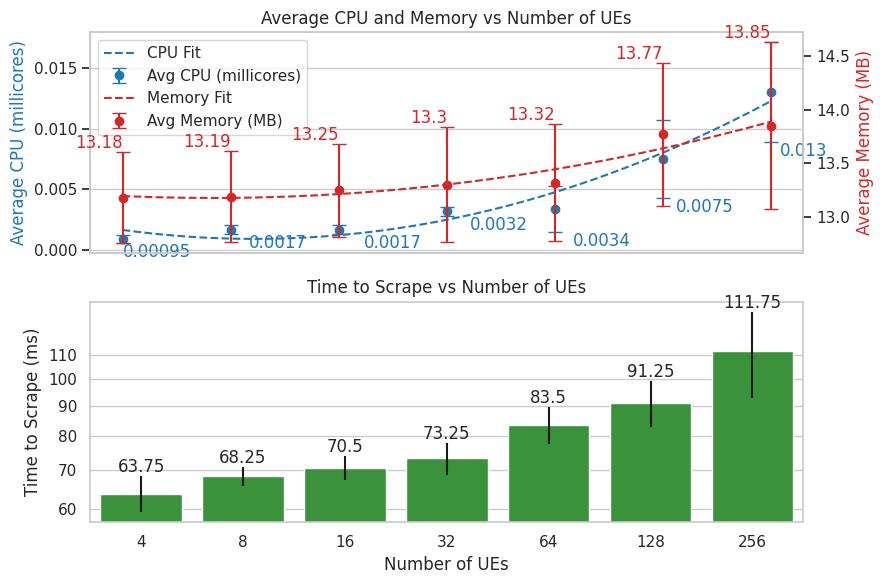

In [6]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=False)

# Line plot for Avg CPU and Avg Memory vs Number UEs with two y-axes
ax1 = axs[0]
ax2 = ax1.twinx()

ax1.errorbar(df['Number UEs'], df['Avg CPU (millicores)'], yerr=df['Std Dev CPU'], fmt='o',capsize=5, label='Avg CPU (millicores)', color='tab:blue')
ax2.errorbar(df['Number UEs'], df['Avg Memory (MB)'], yerr=df['Std Dev Memory'], fmt='o', capsize=5, label='Avg Memory (MB)', color='tab:red')

# Fit polynomial curve
cpu_poly_coeff = np.polyfit(np.log10(df['Number UEs']), df['Avg CPU (millicores)'], 2)
memory_poly_coeff = np.polyfit(np.log10(df['Number UEs']), df['Avg Memory (MB)'], 2)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(min(df['Number UEs']), max(df['Number UEs']), 500)
log_x_values = np.log10(x_values)

# Calculate y values for the polynomial curve
cpu_poly_y = np.polyval(cpu_poly_coeff, log_x_values)
memory_poly_y = np.polyval(memory_poly_coeff, log_x_values)

# Print fit equations
cpu_fit_eq = f"CPU Fit: {cpu_poly_coeff[0]:.3f}*x^2 + {cpu_poly_coeff[1]:.3f}*x + {cpu_poly_coeff[2]:.3f}"
memory_fit_eq = f"Memory Fit: {memory_poly_coeff[0]:.3f}*x^2 + {memory_poly_coeff[1]:.3f}*x + {memory_poly_coeff[2]:.3f}"

print(cpu_fit_eq)
print(memory_fit_eq)

ax1.plot(x_values, cpu_poly_y, '--', color='tab:blue', label='CPU Fit')
ax2.plot(x_values, memory_poly_y, '--', color='tab:red', label='Memory Fit')

ax1.set_title('Average CPU and Memory vs Number of UEs')
ax1.set_xscale('log')
ax1.set_ylabel('Average CPU (millicores)')
ax2.set_ylabel('Average Memory (MB)')
axs[0].yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:red')

# Annotate the values for Avg CPU
for i, v in enumerate(df['Avg CPU (millicores)']):
    ax1.annotate(str(round(v, 5)), (df['Number UEs'][i]+i**1.5, v - df['Std Dev CPU'][i]), ha='left', va='top', color='tab:blue')

# Annotate the values for Avg Memory
for i, v in enumerate(df['Avg Memory (MB)']):
    ax2.annotate(str(round(v, 2)), (df['Number UEs'][i], v + df['Std Dev Memory'][i]), ha='right', va='bottom', color='tab:red')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)
# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs str', y='Time (ms)', yerr=df['Std Dev Time'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Time to Scrape vs Number of UEs')
axs[1].set_xlabel('Number of UEs')
axs[1].set_ylabel('Time to Scrape (ms)')
axs[1].set_yscale('log')

# Set more yticks for the second subplot
yticks = np.arange(60, 120, 10)
axs[1].set_yticks(yticks)
axs[1].set_yticklabels([f'{y}' for y in yticks])

# Annotate the values of each bar
for i, v in enumerate(df['Time (ms)']):
    axs[1].annotate(str(round(v, 3)), (i, v + df['Std Dev Time'][i] + 0.001), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-Monitoring.pdf', bbox_inches='tight')
plt.savefig('out/xApp-Monitoring.png', dpi=300, bbox_inches='tight')
plt.show()